In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from ipywidgets import interact

np.random.seed(19)

## Mini Exercise - CLT

Calculate, theoretically (in your head is fine), the expected value for the average of 6 dice rolls.
Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. Store each of the 10,000 averages in a list.

Plot the distribution of the calculated averages. What do you notice? What kind of distribution is the underlying random variable (i.e. one dice roll?)

In [8]:
rolls = pd.DataFrame(np.random.choice([1, 2, 3, 4, 5, 6], size=(10_000, 6)))

In [9]:
rolls

,0,1,2,3,4,5
0,6,6,3,1,4,5
1,3,3,1,3,6,2
2,3,3,5,1,2,4
3,2,5,6,6,5,2
4,2,3,6,4,2,1
...,...,...,...,...,...,...
9995,6,6,3,3,4,6
9996,1,2,1,5,6,1
9997,4,1,3,4,3,1
9998,6,5,1,5,2,5


In [10]:
rolls['avg'] = rolls.mean(axis = 1)

In [11]:
rolls

,0,1,2,3,4,5,avg
0,6,6,3,1,4,5,4.166667
1,3,3,1,3,6,2,3.000000
2,3,3,5,1,2,4,3.000000
3,2,5,6,6,5,2,4.333333
4,2,3,6,4,2,1,3.000000
...,...,...,...,...,...,...,...
9995,6,6,3,3,4,6,4.666667
9996,1,2,1,5,6,1,2.666667
9997,4,1,3,4,3,1,2.666667
9998,6,5,1,5,2,5,4.000000


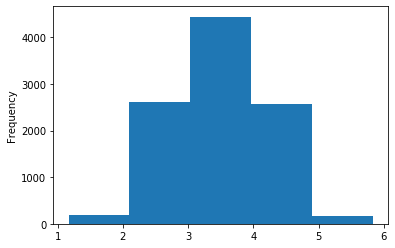

In [19]:
rolls.avg.plot.hist(bins=5)

In [13]:
rolls.mean()

0      3.48210
1      3.49620
2      3.51230
3      3.48440
4      3.49080
5      3.48530
avg    3.49185
dtype: float64

In [21]:
def plot_dice_rolls(n_dice):
    n_sims = 10_000
    rolls = np.random.choice(range(1, 7), (n_sims, n_dice))

    plt.figure(figsize=(10, 7))
    plt.hist(rolls.mean(axis=1), density=True) # density=True gives us a %
    plt.title(f'Average of {n_dice} dice rolls based on {n_sims:,} simulations')
    plt.xlim(0, 7)
    plt.ylabel('% of times we get this value')
    plt.xlabel('Average')

    plt.show()

interact(plot_dice_rolls, n_dice=(1, 50, 2))

interactive(children=(IntSlider(value=25, description='n_dice', max=50, min=1, step=2), Output()), _dom_classe…

<function __main__.plot_dice_rolls(n_dice)>

2 x 2 Categories:

- True / False : Whether we concluded the right or wrong thing
- Positive / Negative: Whether we concluded there is something(+) or there isn't something (-)

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

## Has the network latency gone up since we switched internet service providers?


Data Sources:

- user survey on latency experience
- pre-changes speed tests vs post-change speed tests
    - Speedtest.net
    - Fast.com

speed test changes

- $H_0$: network latency has remained the same since switching to a new ISP
- $H_a$: network latency has improved since the switch to the new ISP


- True Positive
    - low p-value
    - reject $H_0$
    - new avg latency via two different speedtest platforms is 50ms
    - previous avg latency via two different speedtest platforms was 102ms


- False Positive
    - low p-value
    - reject $H_0$
    - a significant difference in latency 
    - latency speeds were calculated during peak hours for old ISP and non-peak hours for new ISP
    
- True Negative
    - high p-value
    - fail to reject $H_0$
    - new avg latency is 90ms
    - previous avg was 100ms
    
- False Negative
    - high p-value
    - fail to reject $H_0$
    - network latency has remained the same
    - bias survey of my nephew still getting pwn'd by noobs in COD

## Is the website redesign any good?

Data Sources:

- user survey on website redesign
- conversion rate changes from old vs new design
- scrape social network sentiment reaction to redesign

conversion rate changes

- $H_0$: conversion rates have remained steady since the website redesign took place
- $H_a$: conversion rates have increased since the website redesign


- True Positive
    - low p-value
    - reject $H_0$
    - conversion rates after redesign are 5.1
    - Conversion rate prior to redesign were 2.2
    

- False Positive
    - low p-value
    - reject $H_0$
    - a significant difference in conversion rates
    - conversion rates data used was pre holiday sales, post was during holiday seasson
    
    
- True Negative
    - high p-value
    - fail to reject $H_0$
    - new avg latency is 3.4
    - previous avg was 3.1
    
    
- False Negative
    - high p-value
    - fail to reject $H_0$
    - conversion rates remained stable
    - landing page for conversion remained the same and wasn't part of the redesign

## Is our television ad driving more sales?

Data Sources:

- user questionaire for how customer came through the door
- special promo code per ad to gauge user engagement with tv ad

promo code per ad

- $H_0$: sales have remained steady regardless of television ad
- $H_a$: televison ad has driven more sales 


- True Positive
    - low p-value
    - reject $H_0$
    - month-over-month sales have increased: 15%
    - previous month-over-month sales rate: 1.9%


- False Positive
    - low p-value
    - reject $H_0$
    - a significant difference sales 
    - everyone was quaratined and you sell toilet paper
    
    
- True Negative
    - high p-value
    - fail to reject $H_0$
    - month-over-month sales rate: 3.1%
    - previous month-over-month sales rate: 2.4%
    
    
- False Negative
    - high p-value
    - fail to reject $H_0$
    - sales figures remained flat
    - your target audience doesn't watch TV during your TV ad slotted time